In [1]:
# environment
import matplotlib.font_manager as fm
import numpy as np
import random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
import os 
import math as mt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
#%matplotlib notebook

cwd = os.getcwd()
pwd = os.path.abspath(os.path.join(cwd, os.pardir))
fontloc = pwd + '/Fonts/SFMono-Regular.otf'
font = fm.FontProperties(fname = fontloc,size = 8); prop = font
proplr = fm.FontProperties(fname = fontloc,size = 12)

fontlocit = pwd + '/Fonts/SFMono-RegularItalic.otf'
fontit = fm.FontProperties(fname = fontlocit,size = 8)
fontsmall = fm.FontProperties(fname = fontloc,size = 8)

#ticks font
def ticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)
    for label in ax.get_zticklabels():
        label.set_fontproperties(font)
        
def xticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_xticklabels():
        label.set_fontproperties(font)
        
def yticks(ax, size):
    font = fm.FontProperties(fname = fontloc,size = size)
    for label in ax.get_yticklabels():
        label.set_fontproperties(font)

@ticker.FuncFormatter
def major_formatter(x, pos):
    label = str("{0:.1f}".format(x)) if x < 0 else str("{0:.2f}".format(x))
    return label

# Lorenz96 Model

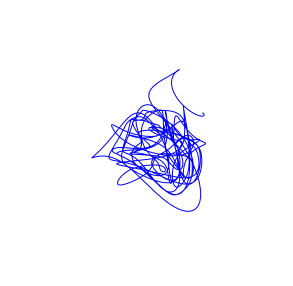

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# These are our constants
N = 36  # Number of variables
F = 8  # Forcing

def lorenz96(x, t):
    """Lorenz 96 model."""
    # Compute state derivatives
    d = np.zeros(N)
    # First the 3 edge cases: i=1,2,N
    d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
    d[1] = (x[2] - x[N-1]) * x[0] - x[1]
    d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
    # Then the general case
    for i in range(2, N-1):
        d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
    # Add the forcing term
    d = d + F

    # Return the state derivatives
    return d

x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[19] += 0.01  # Add small perturbation to 20th variable
t = np.arange(0.0, 30.0, 0.01)

x = odeint(lorenz96, x0, t);

# Plot the first three variables
fig = plt.figure(figsize=(5,5), dpi=200);
ax = fig.gca(projection='3d');
ax.plot(x[:, 0], x[:, 1], x[:, 2], linewidth=1.0, color = 'b');
ax.set_xlabel(r'$\mathregular{x_1}$',fontproperties=font,fontsize=10); 
ax.set_ylabel(r'$\mathregular{x_2}$',fontproperties=font,fontsize=10); 
ax.set_zlabel(r'$\mathregular{x_3}$',fontproperties=font,fontsize=10);
ticks(ax,8); 
ax.xaxis._axinfo["grid"]['linewidth'] = 0.5
ax.yaxis._axinfo["grid"]['linewidth'] = 0.5
ax.zaxis._axinfo["grid"]['linewidth'] = 0.5
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.dist = 12
ax.set_axis_off()

# Lorenz 3D Model

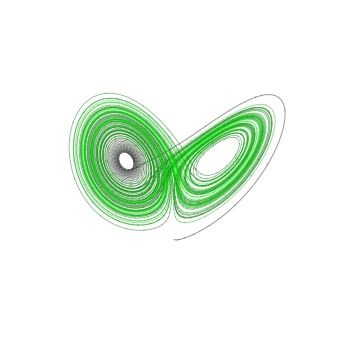

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 20000

def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(6,6), dpi=200);
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(0,c[i],0), alpha=0.4, linewidth=1.0)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()